In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Collection: Data loading and data joining (if necessary)

In [2]:
# Open csv file
file = 'Data/masterdatatoupload.csv'
df = pd.read_csv(file)
print(df.head())

   country                     utility name utility code utility ID  year  \
0  country                             name         code   id_conce  year   
1  Ecuador  EMPRESA ELECTRICA LOS RIOS S.A.     LOS RIOS     201001  1994   
2  Ecuador  EMPRESA ELECTRICA LOS RIOS S.A.     LOS RIOS     201001  1995   
3  Ecuador  EMPRESA ELECTRICA LOS RIOS S.A.     LOS RIOS     201001  1996   
4  Ecuador  EMPRESA ELECTRICA LOS RIOS S.A.     LOS RIOS     201001  1997   

    Type of connection  \
0             typ_conc   
1  Elec - Distribution   
2  Elec - Distribution   
3  Elec - Distribution   
4  Elec - Distribution   

   Total number of connections (residential and non-residential) in the utility area  \
0                                              n_con                                   
1                                                NaN                                   
2                                        42936.83333                                   
3                           

In [3]:
df = df.iloc[1:]

In [4]:
df.head()

,country,utility name,utility code,utility ID,year,Type of connection,Total number of connections (residential and non-residential) in the utility area,Total Number of residential connections in the utility area,Total electricity sold per year (MWh),Length of distribution network (km),...,Number of residential subscribers per 100 households in the concession area (Residential coverage) # / 100 households,Number of customer complaints per year,Average duration between customer complaint and the solution of the problem (hours),Average residential tariff (local nominal currency / MWh),Average industrial tariff (local nominal currency / MWh),Installation Cost (residential) local nominal currency,Installation Cost (Industrial) local nominal currency,Year of privatization,Residencial conexions per employee,Energy sold per employee
1,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1994,Elec - Distribution,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1995,Elec - Distribution,42936.83333,36949.16667,118861.9,NaN,...,NaN,NaN,NaN,49856.47636,173503.0265,NaN,NaN,0,NaN,NaN
3,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1996,Elec - Distribution,46121.91667,40018.5,124118.5,NaN,...,NaN,NaN,NaN,72851.48198,181621.9628,NaN,NaN,0,NaN,NaN
4,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1997,Elec - Distribution,50461.58333,43853.58333,134097.2,NaN,...,NaN,NaN,NaN,289159.1355,277406.999,NaN,NaN,0,NaN,NaN
5,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1998,Elec - Distribution,52293.33333,45854.83333,146304.8,NaN,...,NaN,NaN,NaN,298576.8958,295955.862,NaN,NaN,0,NaN,NaN


In [5]:
# Create a dictionary comprehension to compress columns names
col_dict = {c[0]:c[1] for c in enumerate(df.columns)}
col_dict

{0: 'country',
 1: 'utility name',
 2: 'utility code',
 3: 'utility ID',
 4: 'year',
 5: 'Type of connection',
 6: ' Total number of connections (residential and non-residential) in the utility area',
 7: 'Total Number of residential connections in the utility area',
 8: 'Total electricity sold per year (MWh)',
 9: 'Length of distribution network (km) ',
 10: 'Total number of employees ',
 11: 'Average wholesale price paid per MWh (local nominal currency)',
 12: 'Average transmission charges per MWh purchased (local nominal currency)',
 13: 'OPEX (operation expenditures) of the distribution services (local nominal currency)',
 14: 'CAPEX (captial expenditures) of the distribution services (local nominal currency) ',
 15: 'TOTEX (total expenditures) of the distribution network (local nominal currency)',
 16: 'Energy losses in distribution per year (due to technical losses and illegal connections) %',
 17: 'Energy losses in distribution per year due to technical losses %',
 18: 'Energy l

In [6]:
# Explore available data for one country = Ecuador
df[df.country == "Ecuador"].T

,1,2,3,4,5,6,7,8,9,10,...,271,272,273,274,275,276,277,278,279,280
country,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,...,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador
utility name,EMPRESA ELECTRICA LOS RIOS S.A.,EMPRESA ELECTRICA LOS RIOS S.A.,EMPRESA ELECTRICA LOS RIOS S.A.,EMPRESA ELECTRICA LOS RIOS S.A.,EMPRESA ELECTRICA LOS RIOS S.A.,EMPRESA ELECTRICA LOS RIOS S.A.,EMPRESA ELECTRICA LOS RIOS S.A.,EMPRESA ELECTRICA LOS RIOS S.A.,EMPRESA ELECTRICA LOS RIOS S.A.,EMPRESA ELECTRICA LOS RIOS S.A.,...,EMPRESA EL�CTRICA GUAYAS LOS R�OS S.A.,EMPRESA EL�CTRICA GUAYAS LOS R�OS S.A.,EMPRESA EL�CTRICA GUAYAS LOS R�OS S.A.,EMPRESA EL�CTRICA GUAYAS LOS R�OS S.A.,EMPRESA EL�CTRICA GUAYAS LOS R�OS S.A.,EMPRESA EL�CTRICA GUAYAS LOS R�OS S.A.,EMPRESA EL�CTRICA GUAYAS LOS R�OS S.A.,EMPRESA EL�CTRICA GUAYAS LOS R�OS S.A.,EMPRESA EL�CTRICA GUAYAS LOS R�OS S.A.,EMPRESA EL�CTRICA GUAYAS LOS R�OS S.A.
utility code,LOS RIOS,LOS RIOS,LOS RIOS,LOS RIOS,LOS RIOS,LOS RIOS,LOS RIOS,LOS RIOS,LOS RIOS,LOS RIOS,...,GUAYAS-LOS R�OS,GUAYAS-LOS R�OS,GUAYAS-LOS R�OS,GUAYAS-LOS R�OS,GUAYAS-LOS R�OS,GUAYAS-LOS R�OS,GUAYAS-LOS R�OS,GUAYAS-LOS R�OS,GUAYAS-LOS R�OS,GUAYAS-LOS R�OS
utility ID,201001,201001,201001,201001,201001,201001,201001,201001,201001,201001,...,201020,201020,201020,201020,201020,201020,201020,201020,201020,201020
year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Type of connection,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,...,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution
Total number of connections (residential and non-residential) in the utility area,NaN,42936.83333,46121.91667,50461.58333,52293.33333,55110.66667,57294,60366.83333,62612,66500,...,128777.5833,134043.3333,131535,134595.1667,145441,155624,161440,170846.6667,183023,202525
Total Number of residential connections in the utility area,NaN,36949.16667,40018.5,43853.58333,45854.83333,48250.5,50248,53163.66667,55416,59078,...,117642.5833,122379.8333,120210,122980.1667,133403,142236,149102,158118.8333,175570,188929
Total electricity sold per year (MWh),NaN,118861.9,124118.5,134097.2,146304.8,147138.714,152804.2628,138457.1099,144754.603,148070.103,...,578831.4,537591.418,505578.658,509752.148,408009.7515,401087.231,441757.103,493766.508,528152,561370
Length of distribution network (km),NaN,NaN,NaN,NaN,NaN,2009.88,2150.2,2406.532,3236.522,2469.232,...,4147,4163.4,4262.666,4258.49,3625.766,2653.07,4406.838,4429.338958,5422.1,7952.38


In [7]:
# Amount of individual countries
df['country'].value_counts()

Brazil                            1036
Chile                              613
Argentina                          575
Colombia                           327
Peru                               297
Ecuador                            280
Venezuela                          171
Bolivia                            143
Costa Rica                         112
El Salvador                         90
Per�                                65
Panama                              54
Guatemala                           54
Republica Dominicana                39
Nicaragua                           36
Mexico                              30
Paraguay                            25
Uruguay                             16
St Kitts and Nevis                  16
Belize                              16
Honduras                            13
Jamaica                             13
Haiti                               12
Antigua and Barbuda                  8
St Vincent and the Grenadines        8
Dominica                 

In [8]:
df['country'] = df['country'].replace(['Per�'],'Peru')
# Look at countries again
df['country'].value_counts()

Brazil                            1036
Chile                              613
Argentina                          575
Peru                               362
Colombia                           327
Ecuador                            280
Venezuela                          171
Bolivia                            143
Costa Rica                         112
El Salvador                         90
Panama                              54
Guatemala                           54
Republica Dominicana                39
Nicaragua                           36
Mexico                              30
Paraguay                            25
Belize                              16
St Kitts and Nevis                  16
Uruguay                             16
Honduras                            13
Jamaica                             13
Haiti                               12
Antigua and Barbuda                  8
St Vincent and the Grenadines        8
Dominica                             8
St Lucia                 

In [9]:
df1 = df.apply(pd.to_numeric, args=('coerce',))
print(df1)

      country  utility name  utility code  utility ID  year  \
1         NaN           NaN           NaN    201001.0  1994   
2         NaN           NaN           NaN    201001.0  1995   
3         NaN           NaN           NaN    201001.0  1996   
4         NaN           NaN           NaN    201001.0  1997   
5         NaN           NaN           NaN    201001.0  1998   
...       ...           ...           ...         ...   ...   
4069      NaN           NaN           NaN    208013.0  2002   
4070      NaN           NaN           NaN    208013.0  2003   
4071      NaN           NaN           NaN    208013.0  2004   
4072      NaN           NaN           NaN    208013.0  2005   
4073      NaN           NaN           NaN    208013.0  2006   

      Type of connection  \
1                    NaN   
2                    NaN   
3                    NaN   
4                    NaN   
5                    NaN   
...                  ...   
4069                 NaN   
4070               

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4073 entries, 1 to 4073
Data columns (total 31 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   country                                                                                                                4073 non-null   object
 1   utility name                                                                                                           4073 non-null   object
 2   utility code                                                                                                           4073 non-null   object
 3   utility ID                                                                                                             4064 non-null   object
 4   year  

In [11]:
energy_data = df

In [12]:
ED_utility = energy_data.groupby('country')['utility name'].value_counts()
print(ED_utility)

country               utility name                                          
Antigua and Barbuda   Antigua Public Utilities Authority                         8
Argentina             Empresa Distribuidora Sur S.A.                            22
                      Empresa Distribuidora y Comercializadora Norte S.A.       21
                      Empresa Distribuidora de Energia La Plata S.A.            17
                      Empresa Distribuidora San Luis S.A.                       16
                                                                                ..
Venezuela             C.V.G. Electrificacion del Caroni C.A. Caracas            13
                      CA Luz y Fuerza de Puerto Cabello                         13
                      Compania Anonima de Administracion y Fomento Electrico    13
                      Energia Electrica de la Costa Oriental                    13
                      Sistema Electrico del Estado Nueva Esparta                13
Name: util

## Data Cleaning

### Analysis of Null values

In [13]:
missing = pd.concat([energy_data.isnull().sum(), 100 * energy_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by= ['count','%'], ascending=False)

,count,%
Installation Cost (Industrial) local nominal currency,3922,96.292659
Average duration between customer complaint and the solution of the problem (hours),3739,91.799656
Installation Cost (residential) local nominal currency,3662,89.909158
Average transmission charges per MWh purchased (local nominal currency),3578,87.846796
Energy losses in distribution per year due to non-technical losses (illegal connections) %,3525,86.545544
Number of customer complaints per year,3525,86.545544
Energy losses in distribution per year due to technical losses %,3521,86.447336
Average wholesale price paid per MWh (local nominal currency),3257,79.965627
CAPEX (captial expenditures) of the distribution services (local nominal currency),2932,71.986251
Average frequency of interruptions per subscriber (# interruptions / year),2793,68.573533


In [20]:
# Drop columns with more than 90% of missing values
energy_data.drop(['Average duration between customer complaint and the solution of the problem (hours)','Installation Cost (Industrial) local nominal currency'], axis=1)


,country,utility name,utility code,utility ID,year,Type of connection,Total number of connections (residential and non-residential) in the utility area,Total Number of residential connections in the utility area,Total electricity sold per year (MWh),Length of distribution network (km),...,Average duration of interruptions per subscriber (hours/year),Average frequency of interruptions per subscriber (# interruptions / year),Number of residential subscribers per 100 households in the concession area (Residential coverage) # / 100 households,Number of customer complaints per year,Average residential tariff (local nominal currency / MWh),Average industrial tariff (local nominal currency / MWh),Installation Cost (residential) local nominal currency,Year of privatization,Residencial conexions per employee,Energy sold per employee
1,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1994,Elec - Distribution,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1995,Elec - Distribution,42936.83333,36949.16667,118861.9,NaN,...,NaN,NaN,NaN,NaN,49856.47636,173503.0265,NaN,0,NaN,NaN
3,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1996,Elec - Distribution,46121.91667,40018.5,124118.5,NaN,...,NaN,NaN,NaN,NaN,72851.48198,181621.9628,NaN,0,NaN,NaN
4,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1997,Elec - Distribution,50461.58333,43853.58333,134097.2,NaN,...,NaN,NaN,NaN,NaN,289159.1355,277406.999,NaN,0,NaN,NaN
5,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1998,Elec - Distribution,52293.33333,45854.83333,146304.8,NaN,...,NaN,NaN,NaN,NaN,298576.8958,295955.862,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,Venezuela,C.V.G. Electrificacion del Caroni C.A. Caracas,EDELCA,208013,2002,Elec - Distribution,293,NaN,56147000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,15824.97182
4070,Venezuela,C.V.G. Electrificacion del Caroni C.A. Caracas,EDELCA,208013,2003,Elec - Distribution,314,NaN,57109000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,15916.66667
4071,Venezuela,C.V.G. Electrificacion del Caroni C.A. Caracas,EDELCA,208013,2004,Elec - Distribution,337,NaN,66130000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,17420.96944
4072,Venezuela,C.V.G. Electrificacion del Caroni C.A. Caracas,EDELCA,208013,2005,Elec - Distribution,351,NaN,72754000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,18206.70671


## Data Exploration

### Energy Sold Distribution by Country

Text(0.5, 0, 'Count')

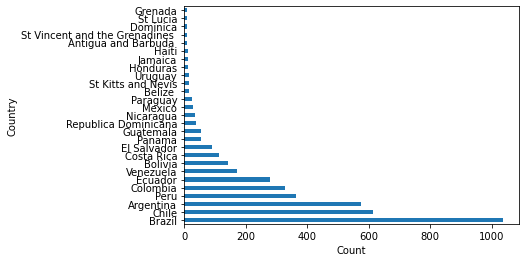

In [15]:
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
energy_data.country.value_counts().plot(kind='barh')
#Give the plot a helpful title of 'Country'
plt.ylabel('Country')
#Label the xaxis 'Count'
plt.xlabel('Count')

Brazil has the most amount of data

### Numerical Data Summary

In [ ]:
energy_data.describe().T

## Save The Cleaned Data

In [19]:
# save the data to a new csv file
energy_data.to_csv('Data/energy_data_cleaned.csv')